In [28]:
# this script builds on Glucose_Time_Series_Forecasting_ML_1 and adds HR and accel data

# only glucose data is used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/Users/jonathanlifferth/PycharmProjects/longevity_solutions_ml/0_master_df.csv')
df = df.drop(columns=['Unnamed: 0'])

In [30]:
# df['datetime'] = pd.to_datetime(df['datetime'])
df = df.drop_duplicates(subset=['datetime'])

df

,datetime,HR,glucose,Vertical,Lateral,Sagittal
0,2014-10-01 19:14:00,68,185.4,1979,2053,2095
6000,2014-10-01 19:19:00,87,178.2,1970,2051,2084
12000,2014-10-01 19:23:00,66,169.2,1985,2001,2009
18000,2014-10-01 19:24:00,75,176.4,1965,2038,2064
24000,2014-10-01 19:29:00,93,172.8,1964,2033,2043
...,...,...,...,...,...,...
1291600,2014-10-04 13:04:00,70,72.0,1989,2067,2099
1292600,2014-10-04 13:09:00,70,79.2,1956,2013,2058
1296800,2014-10-04 13:19:00,50,97.2,1967,2019,2054
1302400,2014-10-04 13:24:00,70,106.2,1969,2028,2057


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

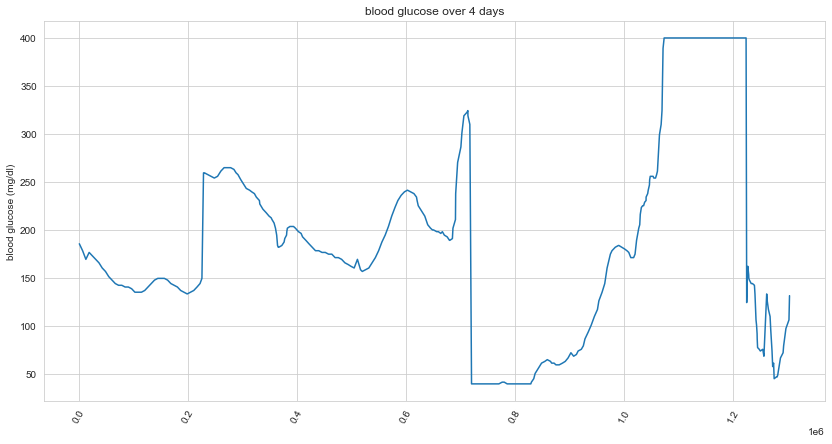

In [31]:
df['glucose'].plot(figsize=(14,7))
plt.title('blood glucose over 4 days')
plt.ylabel('blood glucose (mg/dl)')
sns.set_style('whitegrid')
plt.xticks(rotation=60)

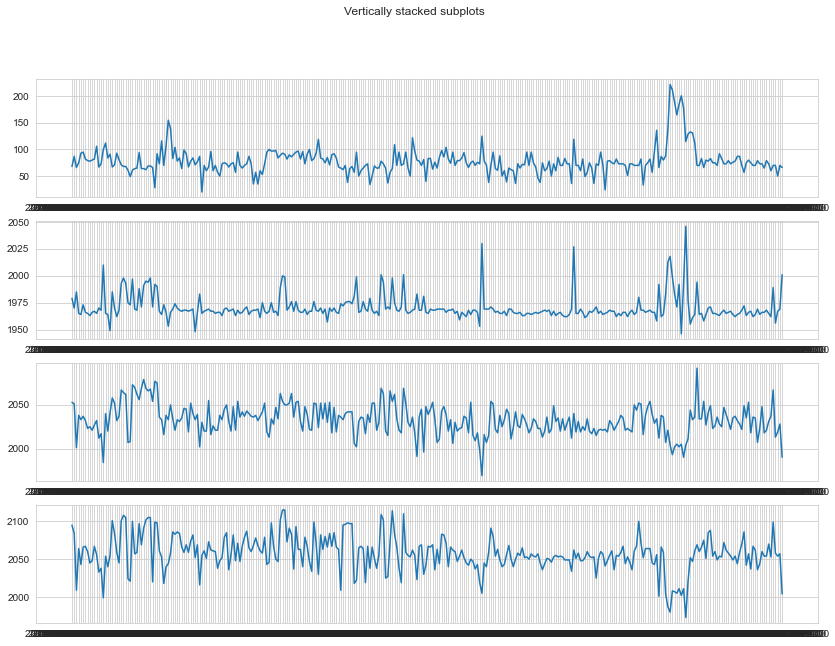

In [5]:
fig, axs = plt.subplots(4, figsize=(14,10))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df.datetime, df.HR)
axs[1].plot(df.datetime, df.Vertical)
axs[2].plot(df.datetime, df.Lateral)
axs[3].plot(df.datetime, df.Sagittal)

In [6]:
# create time windows
window_interval = 30 # time in minutes, smallest possible interval is 5 minutes

# create supervised training column names
g_frame_1 = 'g_minus_' + str(window_interval)
g_frame_2 = 'g_minus_' + str(window_interval * 2)
g_frame_3 = 'g_minus_' + str(window_interval * 3)

hr_frame_1 = 'hr_minus_' + str(window_interval)
hr_frame_2 = 'hr_minus_' + str(window_interval * 2)
hr_frame_3 = 'hr_minus_' + str(window_interval * 3)

ver_frame_1 = 'ver_minus_' + str(window_interval)
ver_frame_2 = 'ver_minus_' + str(window_interval * 2)
ver_frame_3 = 'ver_minus_' + str(window_interval * 3)

lat_frame_1 = 'lat_minus_' + str(window_interval)
lat_frame_2 = 'lat_minus_' + str(window_interval * 2)
lat_frame_3 = 'lat_minus_' + str(window_interval * 3)

sag_frame_1 = 'sag_minus_' + str(window_interval)
sag_frame_2 = 'sag_minus_' + str(window_interval * 2)
sag_frame_3 = 'sag_minus_' + str(window_interval * 3)

# calculate frame shift values (based on 5 minute intervals for glucose readings)
frame_shift_1 = int(window_interval / 5)
frame_shift_2 = int((window_interval * 2) / 5)
frame_shift_3 = int((window_interval * 3) / 5)
print(frame_shift_1, frame_shift_2, frame_shift_3)

df[g_frame_1]=df['glucose'].shift(+frame_shift_1)
df[g_frame_2]=df['glucose'].shift(+frame_shift_2)
df[g_frame_3]=df['glucose'].shift(+frame_shift_3)

df[hr_frame_1]=df['HR'].shift(+frame_shift_1)
df[hr_frame_2]=df['HR'].shift(+frame_shift_2)
df[hr_frame_3]=df['HR'].shift(+frame_shift_3)

df[ver_frame_1]=df['Vertical'].shift(+frame_shift_1)
df[ver_frame_2]=df['Vertical'].shift(+frame_shift_2)
df[ver_frame_3]=df['Vertical'].shift(+frame_shift_3)

df[lat_frame_1]=df['Lateral'].shift(+frame_shift_1)
df[lat_frame_2]=df['Lateral'].shift(+frame_shift_2)
df[lat_frame_3]=df['Lateral'].shift(+frame_shift_3)

df[sag_frame_1]=df['Sagittal'].shift(+frame_shift_1)
df[sag_frame_2]=df['Sagittal'].shift(+frame_shift_2)
df[sag_frame_3]=df['Sagittal'].shift(+frame_shift_3)

# drop na values
df=df.dropna()
df

6 12 18


,datetime,HR,glucose,Vertical,Lateral,Sagittal,g_minus_30,g_minus_60,g_minus_90,hr_minus_30,...,hr_minus_90,ver_minus_30,ver_minus_60,ver_minus_90,lat_minus_30,lat_minus_60,lat_minus_90,sag_minus_30,sag_minus_60,sag_minus_90
108000,2014-10-01 20:39:00,67,135.0,1985,2058,2101,142.2,165.6,185.4,67.0,...,68.0,1970.0,1966.0,1979.0,2012.0,2032.0,2053.0,2033.0,2067.0,2095.0
114000,2014-10-01 20:44:00,71,135.0,1970,2052,2084,142.2,160.2,178.2,73.0,...,87.0,1968.0,1965.0,1970.0,2017.0,2023.0,2051.0,2038.0,2060.0,2084.0
120000,2014-10-01 20:49:00,93,136.8,1962,2032,2059,140.4,156.6,169.2,100.0,...,66.0,2010.0,1963.0,1985.0,1984.0,2025.0,2001.0,1999.0,2045.0,2009.0
126000,2014-10-01 20:54:00,81,140.4,1968,2037,2045,140.4,151.2,176.4,112.0,...,75.0,1965.0,1966.0,1965.0,2040.0,2021.0,2038.0,2054.0,2048.0,2064.0
132000,2014-10-01 20:59:00,71,144.0,1993,2067,2101,138.6,147.6,172.8,84.0,...,93.0,1964.0,1967.0,1964.0,2020.0,2027.0,2033.0,2040.0,2067.0,2043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291600,2014-10-04 13:04:00,70,72.0,1989,2067,2099,61.2,117.0,75.6,73.0,...,76.0,1964.0,1963.0,1964.0,2023.0,2035.0,2035.0,2044.0,2042.0,2049.0
1292600,2014-10-04 13:09:00,70,79.2,1956,2013,2058,45.0,109.8,73.8,73.0,...,78.0,1966.0,1966.0,1962.0,2048.0,2053.0,2037.0,2060.0,2057.0,2054.0
1296800,2014-10-04 13:19:00,50,97.2,1967,2019,2054,46.8,95.4,75.6,65.0,...,87.0,1966.0,1967.0,1964.0,2018.0,2018.0,2032.0,2054.0,2037.0,2044.0
1302400,2014-10-04 13:24:00,70,106.2,1969,2028,2057,46.8,73.8,68.4,79.0,...,87.0,1968.0,1962.0,1965.0,2021.0,2036.0,2028.0,2054.0,2067.0,2059.0


In [7]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [8]:
# combine all supervised learning inputs into a numpy array

import numpy as np

# glucose 
x1,x2,x3,y=df[g_frame_1],df[g_frame_2],df[g_frame_3],df['glucose']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

# HR
x4,x5,x6,y=df[hr_frame_1],df[hr_frame_2],df[hr_frame_3],df['glucose']
x4,x5,x6,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x4,x5,x6,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

# Vertical
x7,x8,x9,y=df[ver_frame_1],df[ver_frame_2],df[ver_frame_3],df['glucose']
x7,x8,x9,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x7,x8,x9,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

# Lateral
x10,x11,x12,y=df[lat_frame_1],df[lat_frame_2],df[lat_frame_3],df['glucose']
x10,x11,x12,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x10,x11,x12,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

# Sagittal
x13,x14,x15,y=df[sag_frame_1],df[sag_frame_2],df[sag_frame_3],df['glucose']
x13,x14,x15,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x13,x14,x15,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)



final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15),axis=1)
print(final_x)
final_x.shape

[[142.2 165.6 185.4 ... 142.2 165.6 185.4]
 [142.2 160.2 178.2 ... 142.2 160.2 178.2]
 [140.4 156.6 169.2 ... 140.4 156.6 169.2]
 ...
 [ 46.8  95.4  75.6 ...  46.8  95.4  75.6]
 [ 46.8  73.8  68.4 ...  46.8  73.8  68.4]
 [ 48.6  66.6 133.2 ...  48.6  66.6 133.2]]


(300, 15)

In [9]:
# split 70/30 into train and test sets 
X_train_size = int(len(final_x) * 0.7)
set_index = len(final_x) - X_train_size
print(set_index)
X_train,X_test,y_train,y_test=final_x[:-set_index],final_x[-set_index:],y[:-set_index],y[-set_index:]

90


In [10]:
rf_model.fit(X_train,y_train) # random forest
lin_model.fit(X_train,y_train) # linear regression

/var/folders/sw/bhwsqj457gg7f1ycx1_p1j480000gn/T/ipykernel_2512/1078656871.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train) # random forest


LinearRegression()

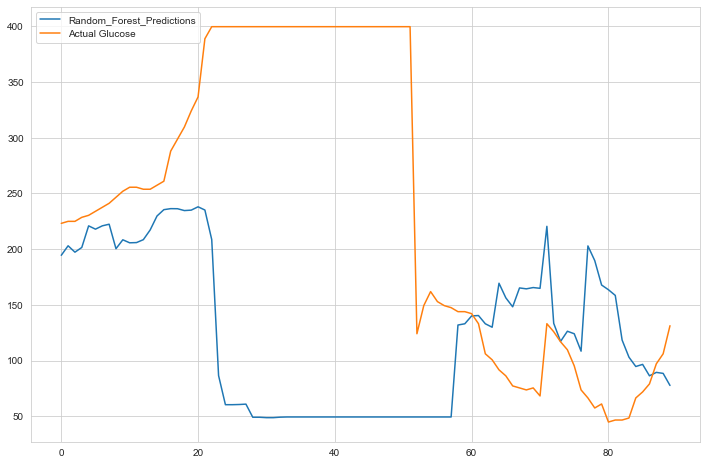

In [11]:
# Random Forest Regressor
pred=rf_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

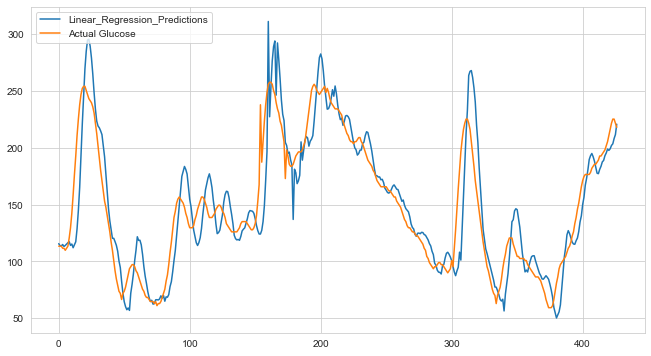

In [12]:
# Linear Regression
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

In [41]:
print(((y_test>200)&(lin_pred>200)).sum())

print((y_train>200).sum())
print((y_test>200).sum())


print((df['glucose']>200).sum())


75
401
98
499


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [15]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 28.739474263454447
Mean Squared Error for Linear Regression Model is: 25.742199497512836


In [16]:
# let's take a look at the actual data in the linear regression predicition df
lin_pred_df = pd.DataFrame(lin_pred)
lin_pred_df.tail()

,0
422,201.873009
423,203.286738
424,207.951095
425,211.410809
426,220.530437
